In [13]:
import itertools
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

random.seed(0)
np.random.seed(0)


In [14]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [15]:
all_features = df.columns.values.tolist()
num_features_total = len(all_features)
print(f"Alle Features: {all_features}")
print(f"Anzahl Features: {num_features_total}")

Alle Features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Anzahl Features: 13


In [16]:
total_feature_combs = 0

for i in range(1, num_features_total):
    current_feature_combs = len([f for f in itertools.combinations(all_features, i)])
    total_feature_combs += current_feature_combs
    print(f"Kombinationen mit  {num} Feature: {current_feature_combs}")

print(f"Total: {total_feature_combs}")

Kombinationen mit  12 Feature: 13
Kombinationen mit  12 Feature: 78
Kombinationen mit  12 Feature: 286
Kombinationen mit  12 Feature: 715
Kombinationen mit  12 Feature: 1287
Kombinationen mit  12 Feature: 1716
Kombinationen mit  12 Feature: 1716
Kombinationen mit  12 Feature: 1287
Kombinationen mit  12 Feature: 715
Kombinationen mit  12 Feature: 286
Kombinationen mit  12 Feature: 78
Kombinationen mit  12 Feature: 13
Total: 8190


In [21]:
best_score = -1
y = dataset.target
test_size = 100
regr = LinearRegression()
best_features = None

for i in range(1, num_features_total+1):
    for features in itertools.combinations(all_features, i):
        df_features = pd.DataFrame(df, columns=features)

        x = df_features.to_numpy()
        indices = np.random.permutation(len(x))

        x_train = x[indices[:-test_size]]
        y_train = y[indices[:-test_size]]

        x_test = x[indices[-test_size:]]
        y_test = y[indices[-test_size:]]

        regr.fit(x_train, y_train)

        score = regr.score(x_test, y_test)

        if score > best_score:
            best_score = score
            best_features = features
            print(f"New best score: {score}")
            print(f"Features: {features}")

print(f"Best score: {best_score}")
print(f"Best Features: {best_features}")

New best score: 0.11914465120162432
Features: ('CRIM',)
New best score: 0.14469763626697707
Features: ('ZN',)
New best score: 0.1733211408381069
Features: ('INDUS',)
New best score: 0.45922412938774826
Features: ('RM',)
New best score: 0.5439957669312794
Features: ('LSTAT',)
New best score: 0.6356297519460797
Features: ('CRIM', 'RM')
New best score: 0.6794528553754362
Features: ('NOX', 'RM')
New best score: 0.7205398829573959
Features: ('RM', 'LSTAT')
New best score: 0.7324882630007442
Features: ('CRIM', 'RM', 'LSTAT')
New best score: 0.7571806786612042
Features: ('CRIM', 'ZN', 'RM', 'B')
New best score: 0.7677379568865085
Features: ('RM', 'AGE', 'PTRATIO', 'B')
New best score: 0.8053826500664881
Features: ('RM', 'AGE', 'PTRATIO', 'LSTAT')
New best score: 0.8217038656613571
Features: ('INDUS', 'NOX', 'RM', 'AGE', 'PTRATIO', 'B')
New best score: 0.83311285204853
Features: ('CRIM', 'ZN', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO')
New best score: 0.8332942556944875
Features: ('CRIM', '

In [22]:
df_features = pd.DataFrame(df, columns=best_features)
x = df_features.to_numpy()
indices = np.random.permutation(len(x))

x_train = x[indices[:-test_size]]
y_train = y[indices[:-test_size]]

x_test = x[indices[-test_size:]]
y_test = y[indices[-test_size:]]

regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

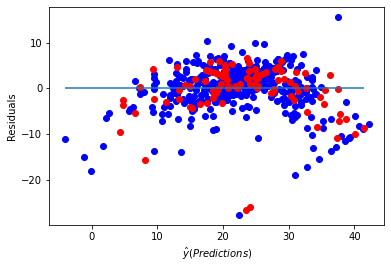

In [27]:
train_pred = regr.predict(x_train)
test_pred = regr.predict(x_test)

min_val = min(np.min(train_pred), np.min(test_pred))
max_val = min(np.max(train_pred), np.max(test_pred))

plt.scatter(train_pred, train_pred - y_train, color="blue")
plt.scatter(test_pred, test_pred - y_test, color="red")
plt.hlines(y=0, xmin=min_val, xmax=max_val)
plt.xlabel("$\hat{y} (Predictions)$")
plt.ylabel("Residuals")
plt.show()